## Window Functions: Rolling & Expanding Metrics

### Rolling average air quality since 2010 for new york city

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

In [2]:
data = pd.read_csv('ozone.csv', parse_dates=['date'], index_col='date')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6167 non-null   float64
dtypes: float64(1)
memory usage: 98.3 KB
None


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6167 non-null   float64
dtypes: float64(1)
memory usage: 98.3 KB
None


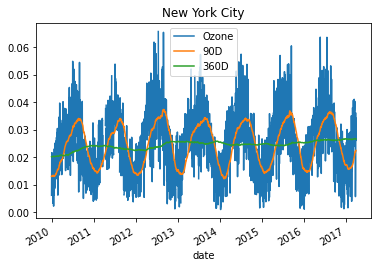

In [2]:



data['90D'] = data.Ozone.rolling('90D').mean()
data['360D'] = data.Ozone.rolling('360D').mean()


data['2010':].plot(title='New York City')
plt.show()

### Rolling 360-day median & std. deviation for nyc ozone data since 2000

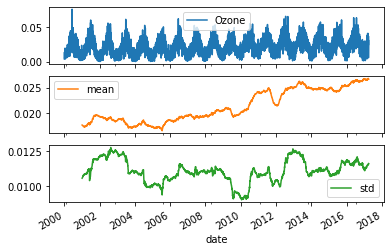

In [3]:

data = pd.read_csv('ozone.csv', parse_dates=['date'], index_col='date').dropna()


rolling_stats = data.Ozone.rolling(360).agg(['mean', 'std'])


stats = data.join(rolling_stats)


stats.plot(subplots=True);
plt.show()

### Rolling quantiles for daily air quality in nyc

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6300 entries, 2000-01-01 to 2017-03-31
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6300 non-null   float64
dtypes: float64(1)
memory usage: 98.4 KB


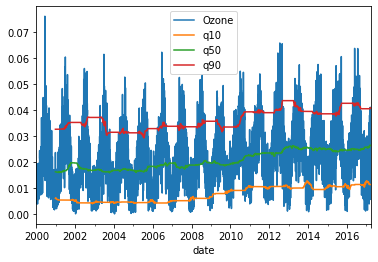

In [4]:

data = data.resample('D').interpolate()
data.info()


rolling = data.rolling(360)['Ozone']


data['q10'] = rolling.quantile(.1)
data['q50'] = rolling.quantile(.5)
data['q90'] = rolling.quantile(.9)


data.plot()
plt.show()


### Rolling quantiles for daily air quality in nyc

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6300 entries, 2000-01-01 to 2017-03-31
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6300 non-null   float64
 1   q10     5941 non-null   float64
 2   q50     5941 non-null   float64
 3   q90     5941 non-null   float64
dtypes: float64(4)
memory usage: 246.1 KB


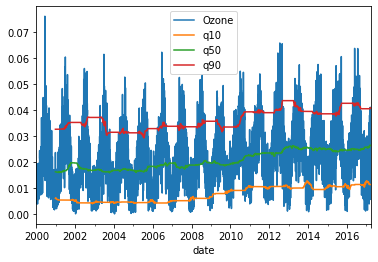

In [5]:

data = data.resample('D').interpolate()
data.info()


rolling = data.rolling(360)['Ozone']


data['q10'] = rolling.quantile(.1)
data['q50'] = rolling.quantile(.5)
data['q90'] = rolling.quantile(.9)


data.plot()
plt.show()


### Cumulative sum vs .diff()

In [6]:

differences = data.diff().dropna()


start_price = data.first('D')


cumulative_sum = start_price.append(differences).cumsum()


print(data.equals(cumulative_sum))


False


In [7]:
data.diff()

,Ozone,q10,q50,q90
date,,,,
2000-01-01,NaN,NaN,NaN,NaN
2000-01-02,0.005454,NaN,NaN,NaN
2000-01-03,-0.003906,NaN,NaN,NaN
2000-01-04,0.003137,NaN,NaN,NaN
2000-01-05,0.005036,NaN,NaN,NaN
...,...,...,...,...
2017-03-27,-0.025772,-0.000058,-0.000035,0.0
2017-03-28,0.008231,0.000000,-0.000035,0.0
2017-03-29,0.020471,0.000000,0.000000,0.0


In [8]:
differences

,Ozone,q10,q50,q90
date,,,,
2000-12-26,-0.008917,0.000124,0.000000,0.0
2000-12-27,-0.007063,0.000000,0.000000,0.0
2000-12-28,0.004205,0.000074,0.000000,0.0
2000-12-29,-0.006578,-0.000074,0.000000,0.0
2000-12-30,0.001185,0.000000,0.000000,0.0
...,...,...,...,...
2017-03-27,-0.025772,-0.000058,-0.000035,0.0
2017-03-28,0.008231,0.000000,-0.000035,0.0
2017-03-29,0.020471,0.000000,0.000000,0.0


In [9]:
start_price

,Ozone,q10,q50,q90
date,,,,
2000-01-01,0.004032,NaN,NaN,NaN


In [10]:
cumulative_sum

,Ozone,q10,q50,q90
date,,,,
2000-01-01,0.004032,NaN,NaN,NaN
2000-12-26,-0.004884,0.000124,0.000000,0.000000
2000-12-27,-0.011947,0.000124,0.000000,0.000000
2000-12-28,-0.007742,0.000197,0.000000,0.000000
2000-12-29,-0.014320,0.000124,0.000000,0.000000
...,...,...,...,...
2017-03-27,-0.014015,0.005284,0.010136,0.008256
2017-03-28,-0.005785,0.005284,0.010101,0.008256
2017-03-29,0.014686,0.005284,0.010101,0.008256


### Cumulative sum vs .diff()

In [11]:

differences = data.diff().dropna()


start_price = data.first('D')


cumulative_sum = start_price.append(differences).cumsum()


print(data.equals(cumulative_sum))


False


### Cumulative return on $1,000 invested in google vs apple I

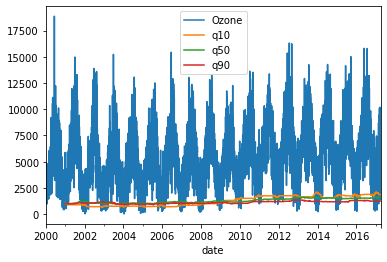

In [12]:

investment = 1000


returns = data.pct_change()


returns_plus_one = returns.add(1)
cumulative_return = returns_plus_one.cumprod()


cumulative_return.mul(investment).plot()
plt.show();

### Cumulative sum vs .diff()

In [13]:

differences = data.diff().dropna()


start_price = data.first('D')


cumulative_sum = start_price.append(differences).cumsum()


print(data.equals(cumulative_sum))

False


### Cumulative return on $1,000 invested in google vs apple I

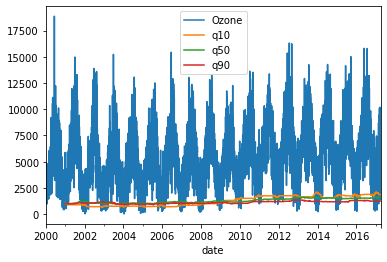

In [14]:

investment = 1000


returns = data.pct_change()


returns_plus_one = returns.add(1)
cumulative_return = returns_plus_one.cumprod()


cumulative_return.mul(investment).plot()
plt.show();

### Cumulative sum vs .diff()

In [15]:

differences = data.diff().dropna()


start_price = data.first('D')


cumulative_sum = start_price.append(differences).cumsum()


print(data.equals(cumulative_sum))

False


### Cumulative return on $1,000 invested in google vs apple I

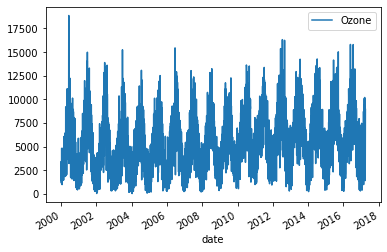

In [18]:

investment = 1000


returns = data.pct_change()


returns_plus_one = returns.add(1)
cumulative_return = returns_plus_one.cumprod()


cumulative_return.mul(investment).plot()
plt.show();

### Cumulative return on $1,000 invested in google vs apple II

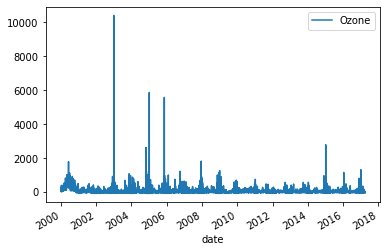

In [19]:

import numpy as np


def multi_period_return(period_returns):
    return np.prod(period_returns + 1) - 1
    

daily_returns = data.pct_change()


rolling_annual_returns = daily_returns.rolling('360D').apply(multi_period_return)


rolling_annual_returns.mul(100).plot();
plt.show()

### Random walk I

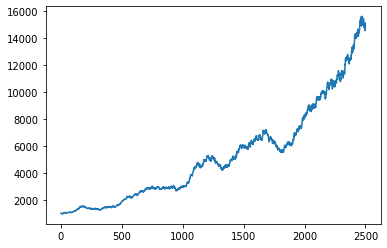

In [24]:



random_walk = np.random.normal(loc=.001, scale=0.01, size=2500)


random_walk = pd.Series(random_walk)


random_prices = random_walk.add(1).cumprod()


random_prices.mul(1000).plot()
plt.show();

### Random walk II

In [100]:
fb = pd.read_csv('fb.csv')

In [101]:
fb.head()

,date,price
0,2012-05-17,38.00
1,2012-05-18,38.23
2,2012-05-21,34.03
3,2012-05-22,31.00
4,2012-05-23,32.00


/Users/hakan.ozler/Developer/Notebooks/venv-3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


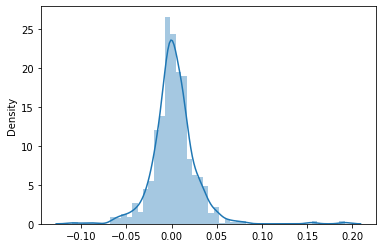

In [102]:

np.random.seed(42)


daily_returns = fb.price.pct_change().dropna()


n_obs = daily_returns.count()


random_walk = np.random.choice(daily_returns, size=n_obs)


random_walk = pd.Series(random_walk)


sns.distplot(random_walk)
plt.show();

### Random walk III

In [103]:
fb['date'] = pd.to_datetime(fb.date)

In [104]:
fb = fb.sort_values(by="date", ascending=False).set_index("date")

In [105]:
del random_price

<AxesSubplot:xlabel='date'>

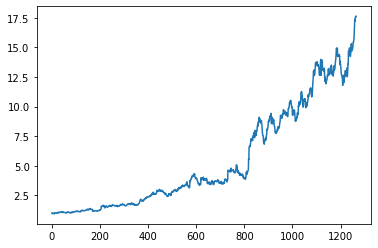

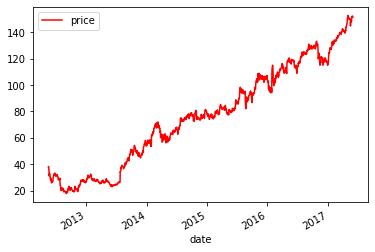

In [106]:

start = fb.price.first('D')


random_walk = random_walk.add(1)
random_price = start.append(random_walk)


random_price = random_price.cumprod()


random_price.plot()
fb.plot(color='r')

### Annual return correlations among several stocks

calculate the year-end returns, the pairwise correlations among all stocks, and visualize the result as an annotated heatmap.

In [115]:
data = pd.read_csv('5_stocks.csv',  parse_dates=['Date'])

In [116]:
data.set_index('Date', inplace=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4001 entries, 2001-07-05 to 2017-05-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    4000 non-null   float64
 1   AMZN    4000 non-null   float64
 2   IBM     4000 non-null   float64
 3   WMT     4000 non-null   float64
 4   XOM     4000 non-null   float64
dtypes: float64(5)
memory usage: 187.5 KB
None
          AAPL      AMZN       IBM       WMT       XOM
AAPL  1.000000  0.208731  0.460568 -0.183553  0.336413
AMZN  0.208731  1.000000  0.346407 -0.367620 -0.133965
IBM   0.460568  0.346407  1.000000  0.155445  0.367253
WMT  -0.183553 -0.367620  0.155445  1.000000  0.178833
XOM   0.336413 -0.133965  0.367253  0.178833  1.000000


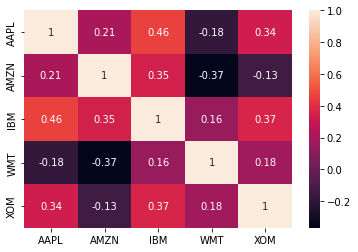

In [118]:

print(data.info())


annual_prices = data.resample('A').last()


annual_returns = annual_prices.pct_change()


correlations = annual_returns.corr()
print(correlations)


sns.heatmap(correlations, annot=True)
plt.show()

## Putting it all together: Building a value-weighted index

### Explore and clean company listing information

In [3]:
listings = pd.read_csv('listings.csv')

In [4]:

print(listings.info())


listings.set_index('Stock Symbol', inplace=True)


listings.dropna(subset=['Sector'], inplace=True)


listings = listings.loc[listings['IPO Year'] < 2019]


print(listings.info())


print(listings.groupby('Sector').size().sort_values(ascending=False))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6674 entries, 0 to 6673
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Exchange               6674 non-null   object 
 1   Stock Symbol           6674 non-null   object 
 2   Company Name           6674 non-null   object 
 3   Last Sale              6590 non-null   float64
 4   Market Capitalization  6674 non-null   float64
 5   IPO Year               2852 non-null   float64
 6   Sector                 5182 non-null   object 
 7   Industry               5182 non-null   object 
dtypes: float64(3), object(5)
memory usage: 417.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 2349 entries, ACU to ZTO
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Exchange               2349 non-null   object 
 1   Company Name           2349 non-null   object 
 2   

### Select and inspect index components

In [5]:

components = listings.groupby(['Sector'])['Market Capitalization'].nlargest(1)


print(components.sort_values(ascending=False))


tickers = components.index.get_level_values('Stock Symbol')
print(tickers)


info_cols = ['Company Name', 'Market Capitalization', 'Last Sale']
print(listings.loc[tickers, info_cols].sort_values('Market Capitalization', ascending=False))

Sector                 Stock Symbol
Technology             AAPL            740024.467000
Consumer Services      AMZN            422138.530626
Miscellaneous          BABA            275525.000000
Health Care            AMGN            118927.210535
Transportation         UPS              90180.886756
Finance                GS               88840.590477
Consumer Non-Durables  ABEV             88240.198455
Basic Industries       RIO              70431.476895
Public Utilities       TEF              54609.806092
Capital Goods          GM               50086.335099
Energy                 PAA              22223.001416
Consumer Durables      CPRT             13620.922869
Name: Market Capitalization, dtype: float64
Index(['RIO', 'GM', 'CPRT', 'ABEV', 'AMZN', 'PAA', 'GS', 'AMGN', 'BABA', 'TEF',
       'AAPL', 'UPS'],
      dtype='object', name='Stock Symbol')
                                    Company Name  Market Capitalization  \
Stock Symbol                                                   

### Import index component price information

Index(['RIO', 'GM', 'CPRT', 'ABEV', 'AMZN', 'PAA', 'GS', 'AMGN', 'BABA', 'TEF',
       'AAPL', 'UPS'],
      dtype='object', name='Stock Symbol')
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1761 non-null   float64
 1   AMGN    1761 non-null   float64
 2   AMZN    1761 non-null   float64
 3   CPRT    1761 non-null   float64
 4   EL      1762 non-null   float64
 5   GS      1762 non-null   float64
 6   ILMN    1761 non-null   float64
 7   MA      1762 non-null   float64
 8   PAA     1762 non-null   float64
 9   RIO     1762 non-null   float64
 10  TEF     1762 non-null   float64
 11  UPS     1762 non-null   float64
dtypes: float64(12)
memory usage: 179.0 KB
None


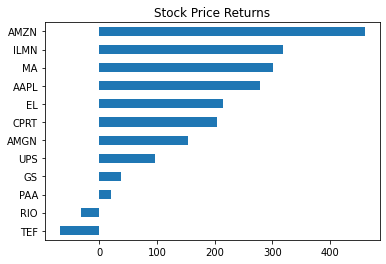

In [6]:

print(tickers)


stock_prices = pd.read_csv('stock_prices.csv', parse_dates=['Date'], index_col='Date')
print(stock_prices.info())


price_return = stock_prices.iloc[-1].div(stock_prices.iloc[0]).sub(1).mul(100)


price_return.sort_values().plot(kind='barh', title='Stock Price Returns')
plt.show()

### Calculate number of shares outstanding

In [7]:

print(listings.info())
print(tickers)


components = listings.loc[tickers,['Market Capitalization', 'Last Sale']]


print(components.head())


no_shares = components['Market Capitalization'] / components['Last Sale']


print(no_shares.sort_values(ascending=False))

<class 'pandas.core.frame.DataFrame'>
Index: 2349 entries, ACU to ZTO
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Exchange               2349 non-null   object 
 1   Company Name           2349 non-null   object 
 2   Last Sale              2349 non-null   float64
 3   Market Capitalization  2349 non-null   float64
 4   IPO Year               2349 non-null   float64
 5   Sector                 2349 non-null   object 
 6   Industry               2349 non-null   object 
dtypes: float64(3), object(4)
memory usage: 211.4+ KB
None
Index(['RIO', 'GM', 'CPRT', 'ABEV', 'AMZN', 'PAA', 'GS', 'AMGN', 'BABA', 'TEF',
       'AAPL', 'UPS'],
      dtype='object', name='Stock Symbol')
              Market Capitalization  Last Sale
Stock Symbol                                  
RIO                    70431.476895      38.94
GM                     50086.335099      33.39
CPRT                   13620.922869  

### Create time series of market value

In [10]:
listings

,Exchange,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry
Stock Symbol,,,,,,,
ACU,amex,Acme United Corporation.,27.3900,91.138992,1988.0,Capital Goods,Industrial Machinery/Components
AAU,amex,"Almaden Minerals, Ltd.",1.7200,154.891745,2015.0,Basic Industries,Precious Metals
USAS,amex,Americas Silver Corporation,3.0500,120.694838,2017.0,Basic Industries,Precious Metals
AINC,amex,Ashford Inc.,57.3373,115.550771,2014.0,Consumer Services,Professional Services
AUXO,amex,"Auxilio, Inc.",6.3043,59.131037,2017.0,Miscellaneous,Business Services
...,...,...,...,...,...,...,...
ZEN,nyse,"Zendesk, Inc.",28.1800,2772.824896,2014.0,Technology,EDP Services
ZPIN,nyse,Zhaopin Limited,17.8500,995.500944,2014.0,Technology,Professional Services
ZOES,nyse,"Zoe&#39;s Kitchen, Inc.",17.0700,332.556067,2014.0,Consumer Services,Restaurants


In [ ]:

no_shares = components['Number of Shares']
print(no_shares.sort_values())


market_cap = stock_prices.mul(no_shares)


first_value = market_cap.iloc[0]
last_value = market_cap.iloc[-1]



pd.concat([first_value, last_value], axis=1).plot(kind='barh')
plt.show()

### Visualize your index constituent correlations

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1761 non-null   float64
 1   AMGN    1761 non-null   float64
 2   AMZN    1761 non-null   float64
 3   CPRT    1761 non-null   float64
 4   EL      1762 non-null   float64
 5   GS      1762 non-null   float64
 6   ILMN    1761 non-null   float64
 7   MA      1762 non-null   float64
 8   PAA     1762 non-null   float64
 9   RIO     1762 non-null   float64
 10  TEF     1762 non-null   float64
 11  UPS     1762 non-null   float64
dtypes: float64(12)
memory usage: 179.0 KB
None
          AAPL      AMGN      AMZN      CPRT        EL        GS      ILMN  \
AAPL  1.000000  0.286898  0.327611  0.346616  0.306770  0.344981  0.264791   
AMGN  0.286898  1.000000  0.323408  0.355892  0.349893  0.390076  0.336927   
AMZN  0.327611  0.323408  1.000000  0.298929  0.334031  0.333402  0.242726 

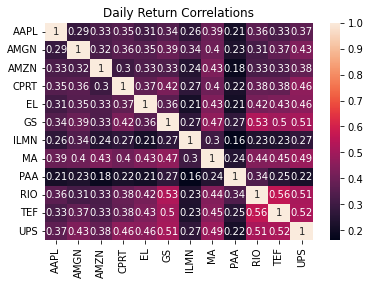

In [11]:

print(stock_prices.info())


returns = stock_prices.pct_change()


correlations = returns.corr()
print(correlations)


sns.heatmap(correlations, annot=True)
plt.title('Daily Return Correlations')
plt.show();
